# Árvores de decisão

* Imagine que um determinado evento ocorra dia sim, dia não, e que dependa de uma série de fatores (cilma, temperatura, vento, etc).
* Você então começa a anotar os dias que esse evento ocorre e como essas variáveis estão naqueles dias.
* Queremos usar esses dados para predizer se o evento vai ocorrer ou não, dados as variáveis
* Vamos usar *Decision Trees*

<img src="decision-tree.png" alt="DT" width="400"/>

* Nós: divide a árvore por um valor de um certo atributo
* Ramos: saída de um Nó
* Raiz: Nó que faz a primeira divisão
* Folhas: Nó final que toma a decisão

Imagine um conjunto de dados com 3 parâmetros (X, Y e Z) com duas classes possíveis

| X | Y | Z | Classe |
| - | - | - | ------ |
| 1 | 1 | 1 |    A   |
| 1 | 1 | 0 |    A   |
| 0 | 0 | 1 |    B   |
| 1 | 0 | 0 |    B   |

* Podemos classificar esse conjunto de dados apenas com a variável Y, pois ela divide perfeitamente o conjunto de dados no meio

As bases matemáticas que o algoritmo usa para escolher a melhor divisão são a "*entropia*" e o "*ganho de informação*". O algoritmo sempre fará a divisão na classe que apresentar o maior ganho de informação.

**Entropia**

$$
H(S) = -\sum_i p_i(S)log_2 p_i(S)
$$

**Ganho de informação**

$$
IG(S,A) = H(S) - \sum_{v \in values(A)}\frac{|S_v|}{S}H(S_v)
$$

# Florestas Aleatórias (Random Forest)

* As Decision Trees são muito suceptíveis a *overfitting*. Elas aprendem e se ajustam muito bem ao grupo de treino mas não conseguem prever direito o grupo de teste. Uma maneira que usamos para corrigir isso é através do método das Random Forests.
* Pega-se o conjunto de dados e divide-o em várias Decision Trees separadas e diferentes, então pede-se a previsão de todas essas DC. Só então pega-se a média dos resultados das DCs. Isso evita o *overfitting*.
* Cada conjunto de dados escolhido, pega-se parâmetros diferentes.

Qual a razão de fazer isso?

* Suponha que exista um parâmetro muito forte. Quando usamos o precesso normal de construção de árvores, a maioria das árvores usarão o mesmo parâmetro como raiz, o que resulta em árvores **muito correlacionadas**.
* Tornando o processo de escolha dos Nós estocástico, nossas RF serão descorrelacionadas e isso resultará na redução da variância do modelo.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('kyphosis.csv')

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


* Kyphosis é a tradução em inglês para problema de "corcunda". O conjunto de dados acima apresenta informações de crianças que possuíam o problema de corcundes e que sofreram um processo cirúrgico. 
* A coluna 'kyphosis' nos diz se o processo foi eficiente ou não.
* A coluna 'Age' nos dá a idade da criança em meses.
* A coluna 'Start' nos diz em qual vértebra começou o procedimento.
* A coluna 'Number' nos diz o número de vértebras que sofreram o procedimento.

In [4]:
df.columns

Index(['Kyphosis', 'Age', 'Number', 'Start'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


## Análise exploratória de dados

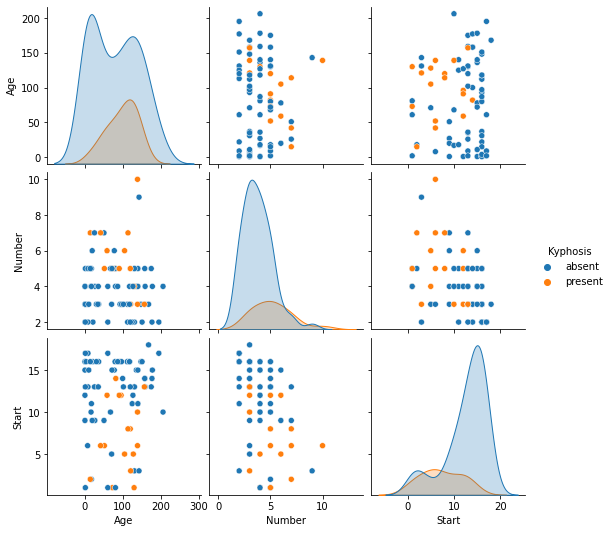

In [7]:
sns.pairplot(df, hue='Kyphosis')

* Para que a gente possa fazer uso do método *Decision Tree* a gente tem que procurar dados que consigamos obter um certo grau de separação com linhas, ou seja, separando em espaços individuais.
* Vemos pelos *scatter plots* que apesar da mistura, existem certas regiões que podem ser separadas em espaço individuais (não vai ser uma separação perfeita).
* Nesse caso ainda poderia-se utilizar outros métodos, como KNN e a Regressão Logística.

## Divisão treino e teste

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = df.drop('Kyphosis',axis=1)
Y = df['Kyphosis']

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

## Treinando o modelo

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
dtree = DecisionTreeClassifier()

In [33]:
dtree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [34]:
pred = dtree.predict(X_test)

## Avaliando o modelo

In [15]:
from sklearn.metrics import classification_report, confusion_matrix

In [35]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

      absent       0.86      1.00      0.92        18
     present       1.00      0.57      0.73         7

    accuracy                           0.88        25
   macro avg       0.93      0.79      0.83        25
weighted avg       0.90      0.88      0.87        25



In [36]:
print(confusion_matrix(Y_test,pred))

[[18  0]
 [ 3  4]]


**Obs:** relembrando que tanto o *classification_report* quanto a *confusion_matrix* só são válidos em modelo de Machine Learning de classificação

In [37]:
np.mean([0.90,0.88,0.87])

0.8833333333333333

Vemos que a precisão é na média em torno de 88%.

Vamos comparar agora esse modelo de Decision Tree com uma Random Forest.

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
# n_estimators é o número de Trees que o modelo vai usar para construir a Forest

rfc = RandomForestClassifier(n_estimators=200)

rfc.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=200)

In [51]:
rfc_pred = rfc.predict(X_test)

In [52]:
print(classification_report(Y_test, rfc_pred))

              precision    recall  f1-score   support

      absent       0.75      1.00      0.86        18
     present       1.00      0.14      0.25         7

    accuracy                           0.76        25
   macro avg       0.88      0.57      0.55        25
weighted avg       0.82      0.76      0.69        25



In [53]:
print(confusion_matrix(Y_test,rfc_pred))

[[18  0]
 [ 6  1]]


Veja que nem sempre o modelo de Random Forest melhora o resultado.

Vamos então fazer uma análise variando o *n_estimators* para ver qual o melhor valor a ser usado.

In [54]:
error_rate=[]

for i in range(1,201):
    rfc = RandomForestClassifier(n_estimators=i)
    rfc.fit(X_train, Y_train)
    predictions = rfc.predict(X_test)
    error_rate.append(np.mean(predictions != Y_test))

Text(0.5, 0, 'n_estimators')

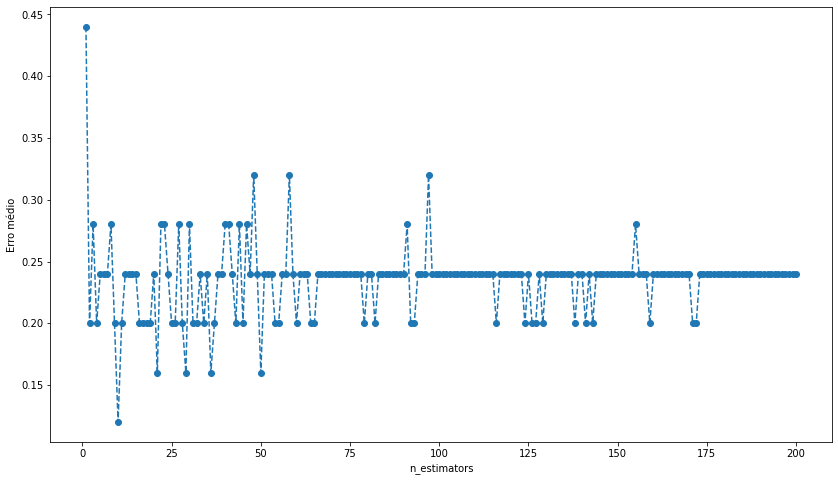

In [56]:
plt.figure(figsize=(14,8))
plt.plot(range(1,201), error_rate, marker='o', linestyle='dashed')
plt.ylabel('Erro médio')
plt.xlabel('n_estimators')

* Podemos ver que como o conjunto de dados é relativamente pequeno (apenas 81 entradas) não importa muito quanto *estimators* usamos pois o modelo já está aproximadamente "na média".
* Vamos escolher então o menor valor de *estimator* (n_estimators=10) para ver quanto conseguimos melhorar em relação a Decision Tree.

In [60]:
rfc = RandomForestClassifier(n_estimators=11)

rfc.fit(X_train, Y_train)
rfc_pred = rfc.predict(X_test)

print(classification_report(Y_test, rfc_pred))

              precision    recall  f1-score   support

      absent       0.82      1.00      0.90        18
     present       1.00      0.43      0.60         7

    accuracy                           0.84        25
   macro avg       0.91      0.71      0.75        25
weighted avg       0.87      0.84      0.82        25



Vejam que mesmo pegando o melhor valor de *estimators* ainda assim não conseguimos chegar na precisão da Decision Tree.